# Cursos de Series de tiempo con *Machine Learning*
## Modulo. Comparando Hyperparametros Para Modelo de Series de tiempo con Machine Learning
                        Elaborado por: Naren Castellon

<center><img src="./imagen/Hyperparameter_Tuning.png" width="700" height="400"></center>

## `Contenido`

1. Qué es Hiperparámetro 
2. Método Grid Search
3. Método Random Search
4. Método Halving Grid Search
5. Método Halving Random Search

## `Hiperparámetro `

` ¿Qué es un hiperparámetro? `

`Un hiperparámetro es` un parámetro cuyo valor se establece antes de que comience el proceso de aprendizaje.

### `¿Qué son los Hiperparámetros en los Modelos de Machine Learning?`

En el mundo del aprendizaje automático y la inteligencia artificial, los **hiperparámetros** juegan un papel crucial en la configuración y rendimiento de los modelos. A menudo, su correcta selección y ajuste puede marcar la diferencia entre un modelo mediocre y uno altamente preciso y eficiente. 

#### `Definición de Hiperparámetros`

Los **hiperparámetros** son configuraciones externas al modelo de aprendizaje automático, cuyo valor no se determina a partir de los datos. En otras palabras, son configuraciones predefinidas que el analista o el ingeniero de datos establece antes del proceso de entrenamiento del modelo. Estos hiperparámetros afectan cómo se entrena el modelo y su rendimiento general.

Algunos ejemplos comunes de hiperparámetros incluyen:
- **Tasa de aprendizaje (learning rate)**: Controla cuánto se ajusta el modelo con cada actualización de los parámetros.
- **Número de árboles en un Random Forest (n_estimators)**: Determina cuántos árboles se utilizarán en el conjunto.
- **Profundidad máxima de un árbol de decisión (max_depth)**: Limita la profundidad de los árboles en el modelo.
- **Número de vecinos en KNN (n_neighbors)**: Especifica cuántos vecinos considerar en el algoritmo de K-Nearest Neighbors.

#### `Hiperparámetros vs. Parámetros de Modelo`

Es importante distinguir entre **hiperparámetros** y **parámetros del modelo**. Los parámetros del modelo son valores que el modelo aprende durante el proceso de entrenamiento, como los coeficientes en una regresión lineal o los pesos en una red neuronal. En cambio, los hiperparámetros son establecidos antes del entrenamiento y no se ajustan a partir de los datos.

Por ejemplo, en una regresión lineal, los coeficientes que multiplican las variables independientes son parámetros del modelo, mientras que la elección del término de regularización en una regresión ridge es un hiperparámetro.

#### `Importancia de los Hiperparámetros`

La correcta selección y ajuste de los hiperparámetros es fundamental por varias razones:
1. **Rendimiento del Modelo**: Los hiperparámetros afectan directamente la precisión y la capacidad de generalización del modelo.
2. **Evitar Overfitting y Underfitting**: Ajustar los hiperparámetros adecuadamente puede ayudar a evitar tanto el sobreajuste (overfitting) como el subajuste (underfitting) del modelo.
3. **Eficiencia Computacional**: Algunos hiperparámetros pueden impactar significativamente el tiempo de entrenamiento y los recursos computacionales necesarios.

#### `Técnicas de Optimización de Hiperparámetros`

La búsqueda de los mejores valores para los hiperparámetros puede realizarse mediante varias técnicas, entre las que se incluyen:

1. **Grid Search**: Evalúa todas las combinaciones posibles de un conjunto predefinido de hiperparámetros. Es exhaustiva pero puede ser costosa en términos de tiempo y recursos computacionales.
2. **Randomized Search**: Selecciona aleatoriamente un conjunto de combinaciones de hiperparámetros y las evalúa. Es más eficiente en espacios de búsqueda grandes y puede encontrar combinaciones óptimas con menos evaluaciones.
3. **Bayesian Optimization**: Utiliza técnicas bayesianas para construir un modelo probabilístico del problema de optimización y seleccionar los valores de hiperparámetros más prometedores para evaluar.
4. **Gradient-Based Optimization**: Para algunos modelos, los gradientes pueden ser utilizados para ajustar los hiperparámetros, aunque esta técnica es menos común.



### Conclusión

Los hiperparámetros son un componente esencial en el aprendizaje automático que afecta significativamente el rendimiento y la capacidad de generalización de los modelos. La correcta selección y ajuste de estos valores puede optimizar los resultados y hacer que un modelo sea más preciso y eficiente. Técnicas como Grid Search, Randomized Search y Bayesian Optimization son herramientas valiosas para encontrar los hiperparámetros óptimos y mejorar el rendimiento de los modelos de machine learning.



## `Cargamos librerias`

In [9]:
# Tratamiento y manipulación de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/Electric_Production.csv", parse_dates= ["DATE"])
df.head()

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    397 non-null    datetime64[ns]
 1   Value   397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


## Análisis Univariante

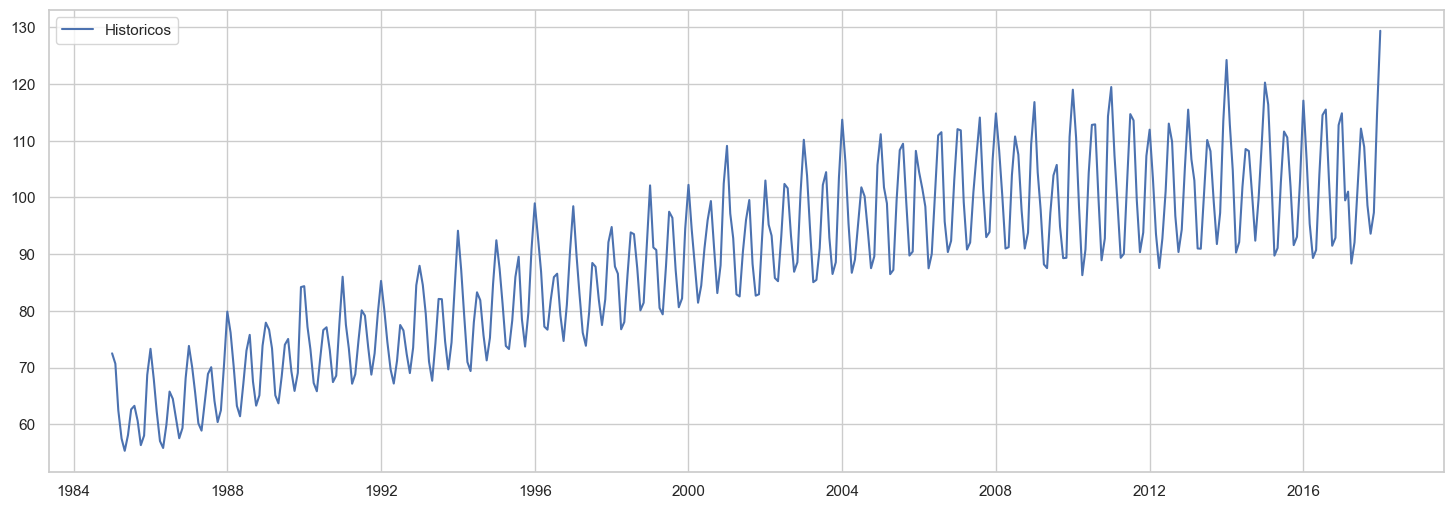

In [7]:
plt.figure(figsize = (18,6))
plt.plot(df["DATE"], df["Value"], label = "Historicos")
plt.legend()
plt.show()

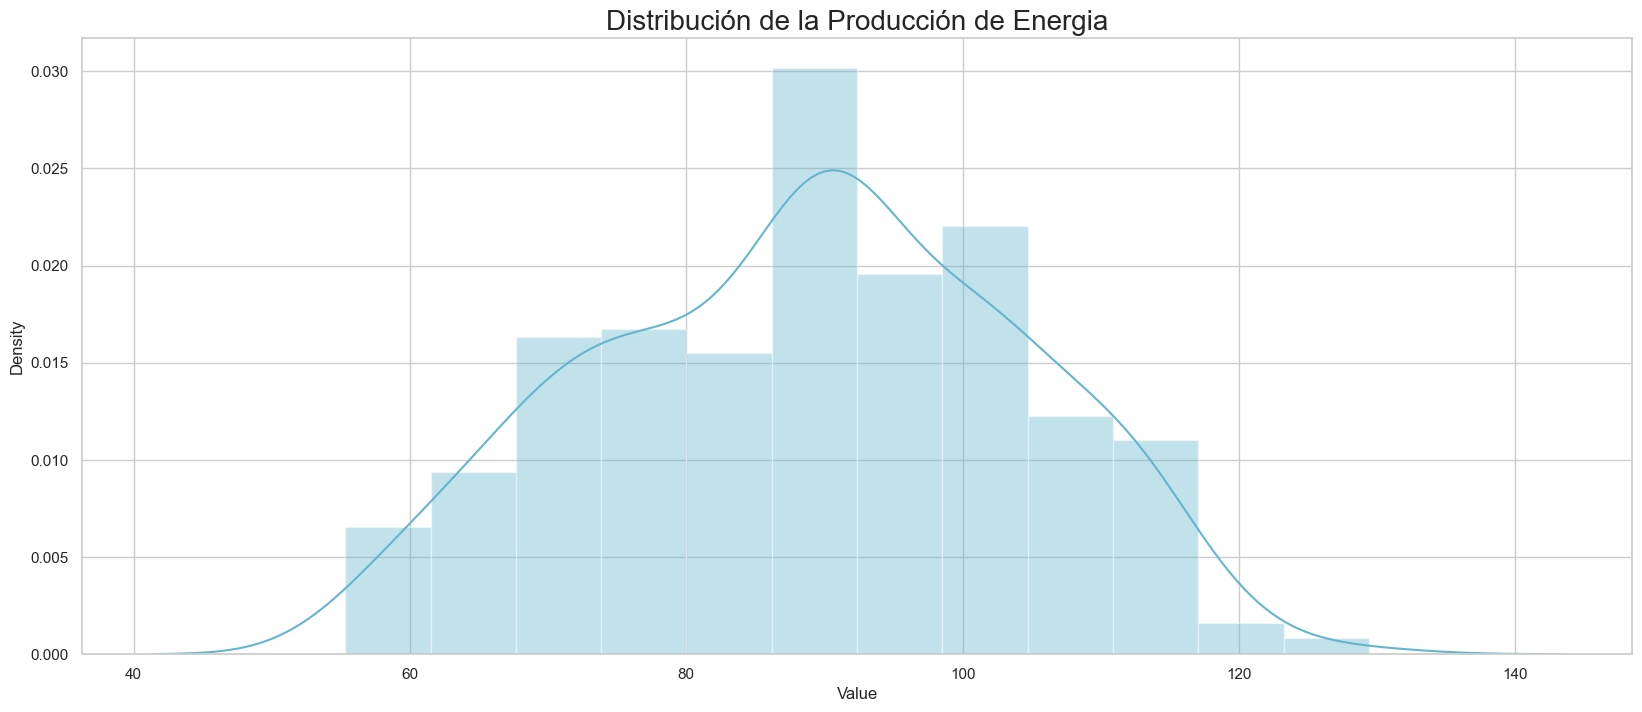

In [4]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(20, 8))
ax = sns.distplot(df['Value'], kde = True, color = 'c')
plt.title('Distribución de la Producción de Energia',size=20);

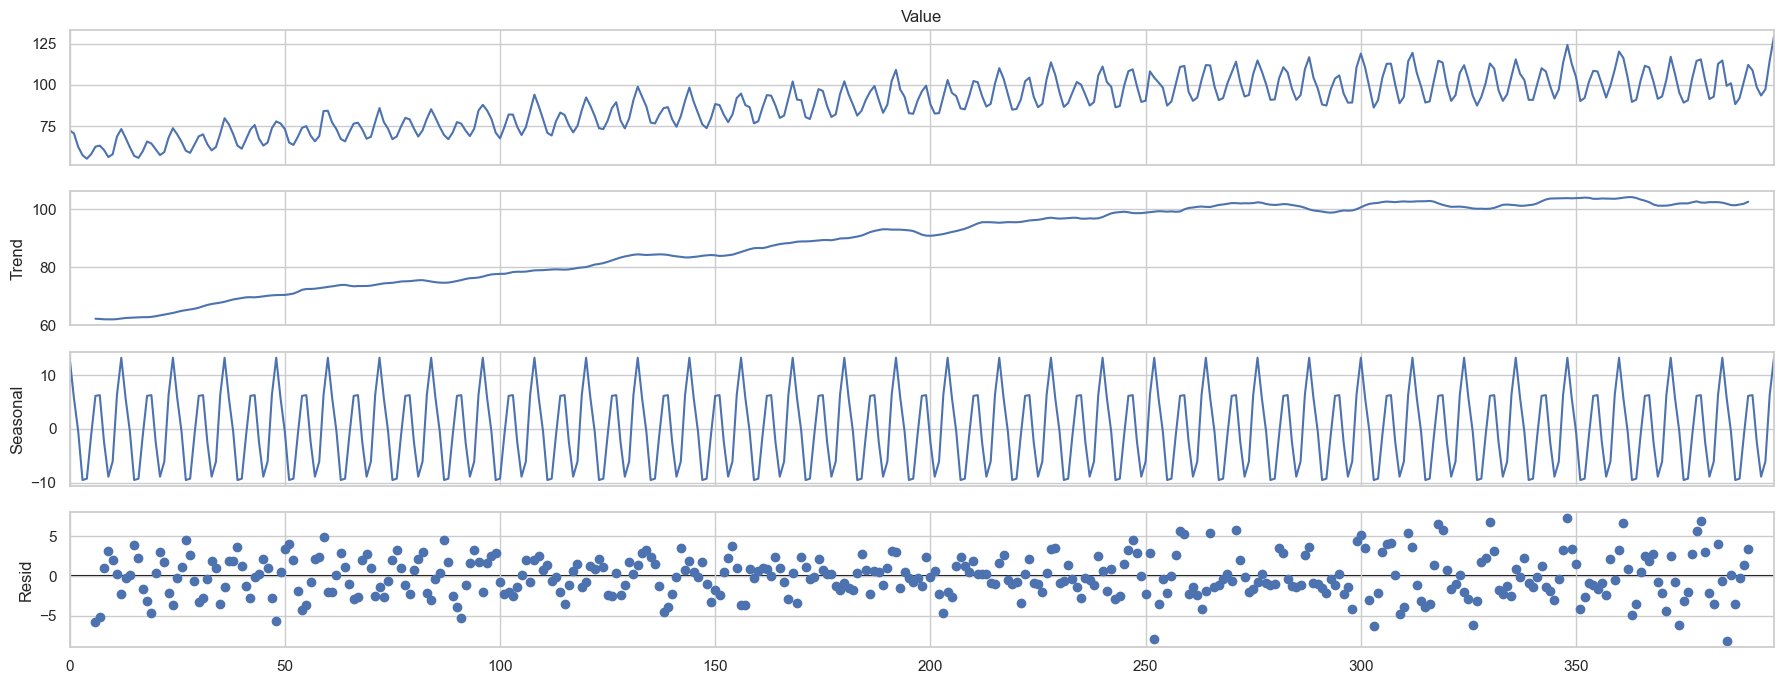

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["Value"], model = "additive", period = 12)
a.plot();

### `Opcional`

En este caso no vamos a `scalar` los datos. Usaremos los datos tal cual como viene

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

# normalizamos los datos
target_name ="price"
robust_scaler = RobustScaler()

# Dividimos los datos en etiquetas
X = df[["Value"]]
feature_names = X.columns
#X = robust_scaler.fit_transform(X)
#y = df[target_name]

## Dividir los datos

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# Definir características y etiqueta
X = df[['DATE']]  # Características
y = df['Value']  # Etiqueta

# Transformar la columna 'DATE' en características numéricas (año, mes, día)
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
data =  df.copy()
data

,DATE,Value,year,month,day
0,1985-01-01,72.5052,1985,1,1
1,1985-02-01,70.6720,1985,2,1
2,1985-03-01,62.4502,1985,3,1
3,1985-04-01,57.4714,1985,4,1
4,1985-05-01,55.3151,1985,5,1
...,...,...,...,...,...
392,2017-09-01,98.6154,2017,9,1
393,2017-10-01,93.6137,2017,10,1
394,2017-11-01,97.3359,2017,11,1
395,2017-12-01,114.7212,2017,12,1


In [12]:
data = data.set_index("DATE")
data

,Value,year,month,day
DATE,,,,
1985-01-01,72.5052,1985,1,1
1985-02-01,70.6720,1985,2,1
1985-03-01,62.4502,1985,3,1
1985-04-01,57.4714,1985,4,1
1985-05-01,55.3151,1985,5,1
...,...,...,...,...
2017-09-01,98.6154,2017,9,1
2017-10-01,93.6137,2017,10,1
2017-11-01,97.3359,2017,11,1


## `Lags`

Agregar lag a nuestro conjunto de datos para pronóstico (forecast) es una técnica utilizada en el análisis de series temporales que implica incorporar valores de períodos anteriores como características adicionales en el modelo. La idea detrás de esta técnica es que los valores pasados pueden tener una relación significativa con los valores futuros, y al incluir estos valores retrasados (lags), se pueden capturar patrones temporales y mejorar la precisión del pronóstico.

In [13]:
num_lags = 10
for lag in range(1, num_lags + 1):
    data[f'lag{lag}'] = data['Value'].shift(lag)

data.dropna(inplace = True)

data

,Value,year,month,day,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
DATE,,,,,,,,,,,,,,
1985-11-01,58.0005,1985,11,1,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
1985-12-01,68.7145,1985,12,1,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
1986-01-01,73.3057,1986,1,1,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
1986-02-01,67.9869,1986,2,1,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
1986-03-01,62.2221,1986,3,1,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,98.6154,2017,9,1,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900
2017-10-01,93.6137,2017,10,1,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694
2017-11-01,97.3359,2017,11,1,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505


In [14]:
X = data[['year', 'month', 'day', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
       'lag6', 'lag7', 'lag8', 'lag9', 'lag10']]

y = data['Value']

## `Dividir los datos en Train y Test`

In [15]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, shuffle = False)

In [16]:
# Dividimos los datos en entrenamiento y en datos de prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 13), (78, 13), (309,), (78,))

In [17]:
X_train

,year,month,day,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
DATE,,,,,,,,,,,,,
1985-11-01,1985,11,1,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
1985-12-01,1985,12,1,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
1986-01-01,1986,1,1,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
1986-02-01,1986,2,1,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
1986-03-01,1986,3,1,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-01,2011,3,1,107.3753,119.4880,114.3266,92.7750,88.9251,100.1209,112.9014,112.8066,104.3538,90.8364
2011-04-01,2011,4,1,99.1028,107.3753,119.4880,114.3266,92.7750,88.9251,100.1209,112.9014,112.8066,104.3538
2011-05-01,2011,5,1,89.3583,99.1028,107.3753,119.4880,114.3266,92.7750,88.9251,100.1209,112.9014,112.8066


In [18]:
X_test

,year,month,day,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
DATE,,,,,,,,,,,,,
2011-08-01,2011,8,1,114.7068,102.8204,90.0698,89.3583,99.1028,107.3753,119.4880,114.3266,92.7750,88.9251
2011-09-01,2011,9,1,113.5958,114.7068,102.8204,90.0698,89.3583,99.1028,107.3753,119.4880,114.3266,92.7750
2011-10-01,2011,10,1,99.4712,113.5958,114.7068,102.8204,90.0698,89.3583,99.1028,107.3753,119.4880,114.3266
2011-11-01,2011,11,1,90.3566,99.4712,113.5958,114.7068,102.8204,90.0698,89.3583,99.1028,107.3753,119.4880
2011-12-01,2011,12,1,93.8095,90.3566,99.4712,113.5958,114.7068,102.8204,90.0698,89.3583,99.1028,107.3753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,2017,9,1,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900
2017-10-01,2017,10,1,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694
2017-11-01,2017,11,1,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505


# `Entrenar Modelo`

**Creamos el modelo Random Forest para regresión**

In [19]:
from sklearn.ensemble import  RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)# Entrenar el modelo

pred_rf = model.predict(X_test)# Hacemos la predicciones
pred_rf

array([110.444032,  99.079984,  90.091596,  91.696935, 108.44459 ,
       115.246718, 110.167436,  99.032663,  90.110038,  91.473966,
       106.16585 , 111.357329, 104.618683,  94.669101,  89.601541,
        92.714202, 108.665167, 113.709418, 108.529583,  98.911473,
        90.849885,  95.044027, 104.742198, 111.215453, 109.671222,
       101.45854 ,  92.116122,  92.011804, 107.528035, 115.862629,
       108.509476,  99.219779,  92.017709, 102.247627, 105.088296,
       111.740991, 111.044297, 102.799178,  92.000112,  92.787843,
       110.001132, 115.476796, 108.461306, 100.137851,  92.411958,
       102.440251, 104.488287, 112.205958, 111.062125, 102.838071,
        91.859494,  92.946305, 107.974946, 114.678894, 110.856471,
       100.925278,  91.853934,  90.841485, 103.919332, 112.496008,
       107.48171 ,  98.017404,  90.177521,  91.956071, 109.045275,
       116.731272, 109.888628, 100.738545,  92.374178,  89.78979 ,
       104.411051, 111.524663, 107.13904 ,  99.287481,  91.064

In [20]:
forecast = pd.DataFrame(y_test)
forecast["rf"] = pred_rf
forecast

,Value,rf
DATE,,
2011-08-01,113.5958,110.444032
2011-09-01,99.4712,99.079984
2011-10-01,90.3566,90.091596
2011-11-01,93.8095,91.696935
2011-12-01,107.3312,108.444590
...,...,...
2017-09-01,98.6154,99.287481
2017-10-01,93.6137,91.064483
2017-11-01,97.3359,93.151932


En este modelo que hemos creado de `RandomForestRegressor()` no hemos agregado ningún tipo de parametro

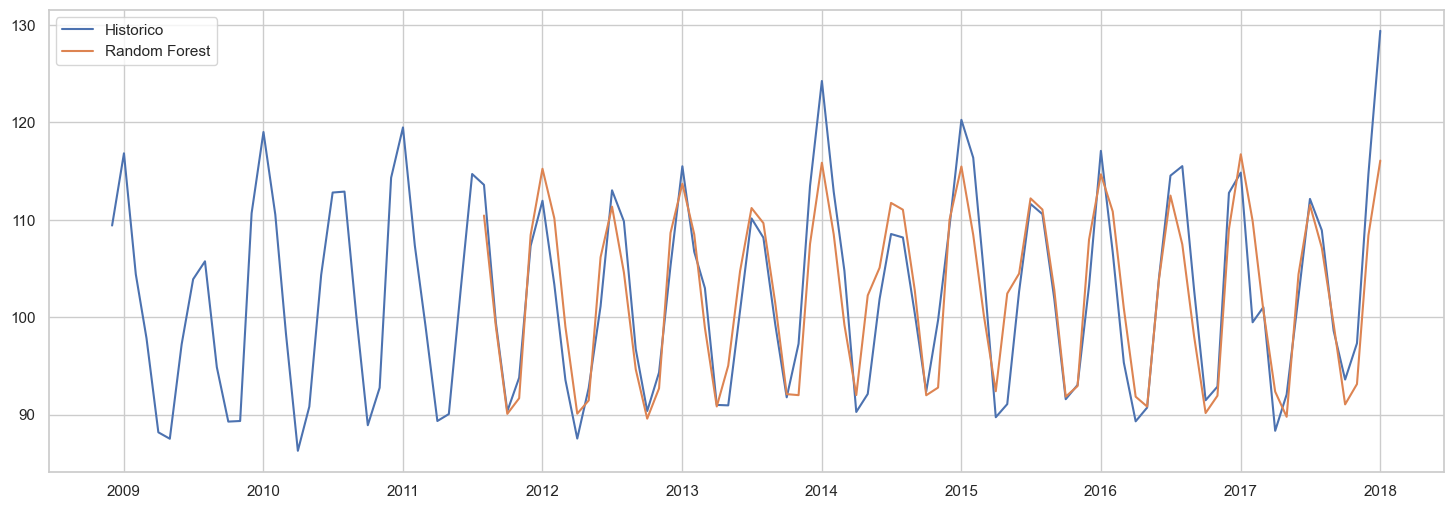

In [21]:
plt.figure(figsize =  (18,6))
plt.plot(data.index[-110:], data["Value"][-110:], label = "Historico")
plt.plot(forecast.index , forecast["rf"], label = "Random Forest")
plt.legend()
plt.show()

## `Performance Model`

In [22]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf))

Testing R2 Score:  79.91468817729152
Testing RMSE:  4.297809705613255
Testing MAE:  3.2627362692307718
Testing MSE:  18.471168265663493


Cuando usamos la búsqueda manual, elegimos algunos hiperparámetros del modelo según nuestro juicio/experiencia. Luego entrenamos el modelo, evaluamos su precisión y comenzamos el proceso nuevamente. Este bucle se repite hasta que se obtiene una precisión satisfactoria.

`Los principales parámetros utilizados por un Random Forest Regresor` son:

* `criterio =` la función utilizada para evaluar la calidad de una división.
* `max_ depth =` número máximo de niveles permitidos en cada árbol.
* `max_features =` número máximo de características consideradas al dividir un nodo.
* `min_samples_leaf =` número mínimo de muestras que se pueden almacenar en una hoja de árbol.
* `min_samples_split =` número mínimo de muestras necesarias en un nodo para provocar la división del nodo.
* `n_estimadores =` número de árboles en el conjunto.
* `bootstrap =` método para muestrear puntos de datos (con o sin reemplazo)

Revisar el siguiente link para ver los paramétros

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## `Randomized Search`

`¿Qué es Randomized Search?`

**Randomized Search** es una técnica de optimización de hiperparámetros que, a diferencia de Grid Search (que evalúa todas las combinaciones posibles de hiperparámetros), selecciona aleatoriamente un conjunto de combinaciones y las evalúa. Esta aleatoriedad permite a Randomized Search explorar el espacio de búsqueda de manera más amplia y con menos evaluaciones, lo que puede ser especialmente útil cuando los recursos computacionales son limitados.

Desde un punto de vista practico, `RandomizedSearchCV` es más importante que una búsqueda de `Grid` normal. Esto se debe a que una cantidad media de datos, o con un modelo que incluye algunos parámetros, es demasiado costoso computacionalmente  probar todas las combinaciones de parámetros involucradas en GridSearch completo.

Los recursos computacionales probablemente se gasten mejor estratificando muy bien el muestreo o mejorando los procedimientos de aleatorización.

## `Funcionamiento de búsqueda aleatoria`

1. **Definición del Espacio de Búsqueda**: Al igual que en Grid Search, primero se define el espacio de búsqueda, es decir, los hiperparámetros y sus posibles valores. Sin embargo, en lugar de evaluar todas las combinaciones posibles, se especifica el número de iteraciones (combinaciones) que se desean probar de manera aleatoria.

2. **Selección aleatoria de combinaciones**: Randomized Search selecciona aleatoriamente un conjunto de combinaciones de hiperparámetros dentro del espacio de búsqueda definido.

3. **Evaluación de Combinaciones**: Cada combinación seleccionada se evalúa utilizando una técnica de validación cruzada para garantizar que los resultados sean robustos y no dependan de una única partición de los datos.

4. **Selección del Mejor Modelo**: Después de evaluar las combinaciones seleccionadas aleatoriamente, Randomized Search elige la que proporciona el mejor rendimiento del modelo según una métrica de evaluación predefinida (por ejemplo, precisión, error cuadrático medio, F1-score) .


#### `Ventajas de búsqueda aleatoria`

- **Eficiencia**: Al evaluar solo un subconjunto de combinaciones posibles, la búsqueda aleatoria es más eficiente en términos de tiempo y recursos computacionales en comparación con Grid Search.
- **Exploración Amplia**: Tiene más probabilidades de encontrar combinaciones óptimas cuando el número de evaluaciones es limitado, especialmente en espacios de búsqueda grandes y complejos.
- **Flexibilidad**: Permite una mayor flexibilidad en la especificación del espacio de búsqueda, ya que se pueden utilizar distribuciones probabilísticas para los hiperparámetros.

#### `Desventajas de búsqueda aleatoria`

- **Cobertura Incompleta**: No garantiza que se evalúen todas las combinaciones posibles, lo que puede llevar a pasar por alto la combinación óptima.
- **Variabilidad**: Los resultados pueden variar entre ejecuciones debido a la naturaleza aleatoria del método, aunque esto se puede mitigar utilizando un `random_state` fijo.

## `Random Search`

En Random Search, creamos una cuadrícula de hiperparámetros y entrenamos/probamos nuestro modelo solo con una combinación aleatoria de estos hiperparámetros. En este ejemplo, además, decidí realizar una validación cruzada en el conjunto de entrenamiento.

Al realizar tareas de aprendizaje automático, generalmente dividimos nuestro conjunto de datos en conjuntos de entrenamiento y prueba. Esto se hace para probar nuestro modelo después de haberlo entrenado (de esta manera podemos comprobar su rendimiento cuando se trabaja con datos no vistos). Cuando usamos la validación cruzada, dividimos nuestro conjunto de entrenamiento en otras N particiones para asegurarnos de que nuestro modelo no sobreajuste nuestros datos.


Uno de los métodos de validación cruzada más utilizados es la validación K-Fold. En K-Fold, dividimos nuestro conjunto de entrenamiento en N particiones y luego entrenamos iterativamente nuestro modelo usando N-1 particiones y lo probamos con la partición sobrante (en cada iteración cambiamos la partición sobrante). Una vez que hemos entrenado N veces el modelo, promediamos los resultados de entrenamiento obtenidos en cada iteración para obtener nuestros resultados generales de rendimiento de entrenamiento.

El uso de la validación cruzada al implementar la optimización de hiperparámetros puede ser muy importante. De esta forma, podríamos evitar el uso de algunos hiperparámetros que funcionan muy bien con los datos de entrenamiento pero no tan bien con los datos de prueba.

Ahora podemos comenzar a implementar la búsqueda aleatoria desafiando primero una cuadrícula de hiperparámetros que se muestrearán aleatoriamente al llamar a `RandomizedSearchCV()`.

**Paso 1:** Creamos el modelo Random Forest para regresión

In [23]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

param_grid = {
    'bootstrap': [True],
    'max_depth': range(2, 20, 1),
    'max_features': range(2, 8, 1),
    'min_samples_leaf': range(2, 5, 1),
    'min_samples_split': [8, 10, 12],
    'n_estimators':  range(100, 2000, 100),
    'criterion': ["squared_error", "r2"]       }  

In [24]:
# Creamos el modelo
clf = RandomForestRegressor()

# Creamos el modelo del hiperparametro
model_rs = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, n_iter = 10, 
                           cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
                               
model_rs.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['squared_error', 'r2'],
                                        'max_depth': range(2, 20),
                                        'max_features': range(2, 8),
                                        'min_samples_leaf': range(2, 5),
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': range(100, 2000, 100)},
                   random_state=101, verbose=1)

In [25]:
print(f'El mejor parametro es: {model_rs.best_params_}')

El mejor parametro es: {'n_estimators': 1100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 7, 'max_depth': 18, 'criterion': 'squared_error', 'bootstrap': True}


Guardamos los mejores parametros seleccionado

In [26]:
best_grid = model_rs.best_estimator_
best_grid

RandomForestRegressor(max_depth=18, max_features=7, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=1100)

## `Entrenando el Modelo`
Entrenamos los nuestro modelo con los mejores parametros seleccionados

In [27]:
best_grid.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, max_features=7, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=1100)

## `Haciendo predicciones`

In [28]:
pred_rf_rs = best_grid.predict(X_test)
pred_rf_rs

array([109.88742038,  98.65969278,  90.03301049,  91.3019218 ,
       107.4300034 , 113.50581744, 110.21228229,  98.91947569,
        90.50930163,  91.40467313, 105.44780718, 110.53901037,
       104.97459082,  94.74159866,  89.44784757,  92.14571948,
       107.53892577, 112.47543137, 108.41091111,  98.66077778,
        92.63594774,  94.6581592 , 103.98624512, 110.3638829 ,
       110.09581815, 100.94673057,  92.24823658,  91.81651565,
       105.5156481 , 113.03974595, 108.72660184,  99.35782899,
        94.66112463, 100.47165594, 104.86493218, 110.70434341,
       110.36521686, 101.80305105,  92.51498188,  92.31399812,
       106.81850473, 113.11327721, 108.57910564, 100.15309193,
        95.38173027, 100.8818598 , 103.92302252, 111.75431327,
       110.16044914, 101.99351689,  92.72333102,  92.27914095,
       105.92283392, 113.42603557, 110.5321716 , 100.80586251,
        92.38401998,  91.20118333, 103.41479625, 111.92509516,
       107.81332156,  97.97688538,  91.41274022,  91.67

In [29]:
forecast["rf_random_search"] = pred_rf_rs
forecast

,Value,rf,rf_random_search
DATE,,,
2011-08-01,113.5958,110.444032,109.887420
2011-09-01,99.4712,99.079984,98.659693
2011-10-01,90.3566,90.091596,90.033010
2011-11-01,93.8095,91.696935,91.301922
2011-12-01,107.3312,108.444590,107.430003
...,...,...,...
2017-09-01,98.6154,99.287481,99.283066
2017-10-01,93.6137,91.064483,91.220886
2017-11-01,97.3359,93.151932,93.346552


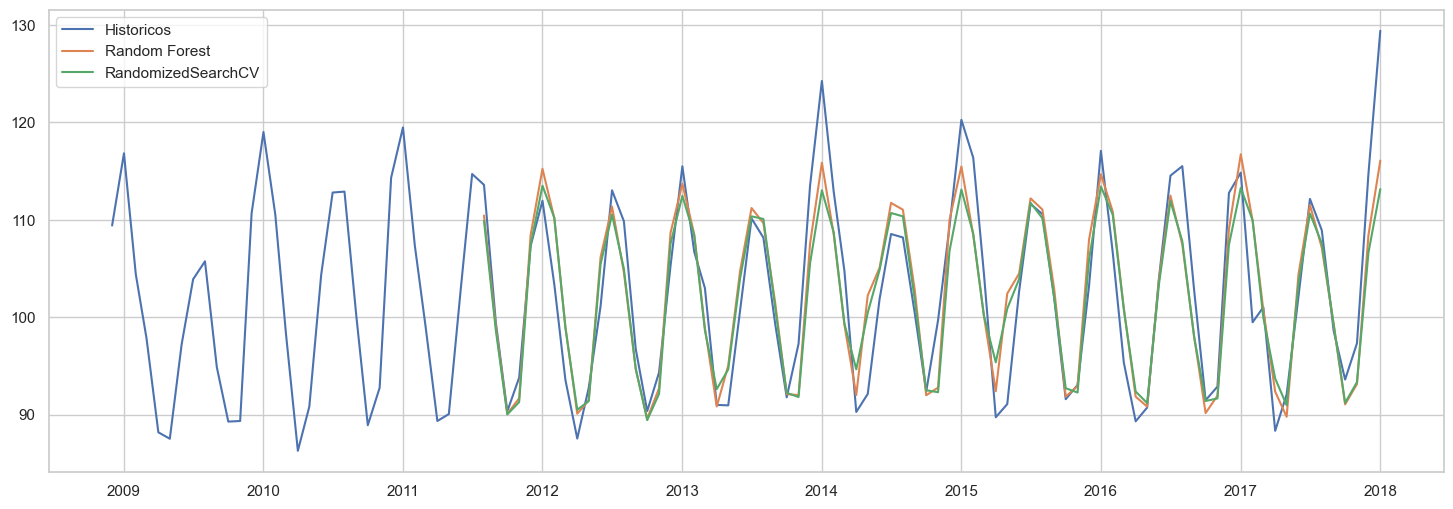

In [30]:
plt.figure(figsize =  (18,6))
plt.plot(data.index[-110:], data["Value"][-110:], label = "Historicos")
plt.plot(forecast.index , forecast["rf"], label = "Random Forest")
plt.plot(forecast.index , forecast["rf_random_search"], label = "RandomizedSearchCV")
plt.legend()
plt.show()

## `Performance Models`

In [31]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
print('Testing R2 Score: ', r2_score(y_test, pred_rf_rs)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf_rs)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf_rs))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf_rs))

Testing R2 Score:  77.28422212552039
Testing RMSE:  4.570584049534068
Testing MAE:  3.4276282993306926
Testing MSE:  20.890238553855234


# `Grid Search`

`GridSearchCV` es un método para recorrer todas posibles combinaciones de hiperparámetros y emplear la validación cruzada para elegir los hiperparámetros óptimos. Para cada combinanción de hiperparámetros, no queremos limitarnos a una sola puntuación de precisión. Por lo tanto, para comprender mejor la precisión del estimador de cada combinación, utilizamos la validación cruzada de K-Fold. Luego, los datos se dividen  en varios Folds y, para cada iteración, todos los folds menos uno se usan para el entrenamiento y el restante se usa para la prueba. Este método para el ajuste hiperparámetro realiza una busqueda exhaustiva sobre todas las posibles combinaciones de parámetros, de ahí el prefijo `Grid`. En el siguiente ejemplo le damos a `GridSearchCV` un diccionario Python con todos los valores de los parámetros que queremos ajustar. También especificamos el número de Folds en lo que queremos dividir los datos, y luego llamamos al método de ajuste de grid search con los datos de entrenamiento. 

## `Funcionamiento de Grid Search`

1. **Definición del Espacio de Búsqueda**: Se seleccionan los hiperparámetros que se desean optimizar y se definen sus posibles valores. Por ejemplo, para un modelo de Random Forest, los hiperparámetros pueden incluir el número de árboles (`n_estimators`), la profundidad máxima (`max_depth`), el número mínimo de muestras por hoja (`min_samples_leaf`), entre otros.

2. **Evaluación de Combinaciones**: Grid Search genera todas las combinaciones posibles de los valores de los hiperparámetros y entrena y evalúa el modelo con cada combinación. Esto se hace utilizando una técnica de validación cruzada para garantizar que los resultados sean robustos y no dependan de una única partición de los datos.

3. **Selección del Mejor Modelo**: Después de evaluar todas las combinaciones, Grid Search selecciona la que proporciona el mejor rendimiento del modelo según una métrica de evaluación predefinida (por ejemplo, precisión, error cuadrático medio, F1-score).


## `Ventajas de Grid Search`

- **Cobertura Exhaustiva**: Evalúa todas las combinaciones posibles de los hiperparámetros, asegurando que no se omite ninguna opción potencialmente óptima.
- **Simplicidad**: Es fácil de implementar y entender, lo que lo hace accesible incluso para aquellos que son nuevos en el aprendizaje automático.

 **Desventajas de GridSearchCV** 
        
1. Computacionalmente costoso: Es obvio que con más valores de parámetros, `GridSearchCV` será computacionalmente más costoso. Consideremos el siguiente ejemplo en el que tenemos 5 parámetros y supongamos que nos gustaría probar 5 valores para cada parámetro lo que dará como resultado $5^5=3125$ combinaciones. Multipliquemos aún esto con un número de cross-validation folds, por ejemplo si $k=5$, entonces $3,125\times 5=15,625$.
    
2. Parámetros no perfectamente óptimo, pero casi óptimo: `GridSearchCV` buscará los puntos fijos que que le proporcionemos para los parámetros numérico, por lo que existe una gran posibilidad de perder el punto óptimo que se encuentra entre los puntos fijos. Por ejemplo, supongamos que le gustaría probar los puntos fijos para `n_estimators`:$[100,250,500,750,1000]$ para un modelo de árbol  de decisión  y existe la posibilidad de que el punto óptimo se encuentre entre los dos puntos fijos. Sin embargo, `GridSearchCV` no está diseñado para buscar entre puntos fijos.

`Grid Search` es una herramienta poderosa para la optimización de hiperparámetros en modelos de machine learning. Su enfoque exhaustivo garantiza que se evalúen todas las combinaciones posibles, proporcionando así un modelo optimizado. Sin embargo, su costo computacional puede ser elevado, por lo que en problemas con un espacio de búsqueda muy grande, puede ser recomendable considerar otras técnicas como Random Search o métodos 


## **Grid Search**
En el Grid Search, configuramos una grid de hiperparámetros y entrenamos/probamos nuestro modelo en cada una de las combinaciones posibles.
Para elegir los parámetros que se utilizarán en la Grid Search, ahora podemos ver qué parámetros funcionaron mejor con la Random Search y formar una grid basada en ellos para ver si podemos encontrar una mejor combinación.

Grid Search se puede implementar en Python usando la función scikit-learn `GridSearchCV()`.

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = {
    'bootstrap': [True],
    'max_depth': range(2, 20, 1),
    'max_features': range(2, 8, 1),
    'min_samples_leaf': range(2, 5, 1),
    'min_samples_split': [8, 10, 12],
    'n_estimators':  range(100, 2000, 100),
    'criterion': ["squared_error", "r2"]       }  

In [ ]:
clf2 = RandomForestRegressor()
model_gs = GridSearchCV(estimator = clf2, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model_gs.fit(X_train,y_train)

**Paso 5:** Visualización de resultados

In [ ]:
print(f'El mejor parametro es: {model_gs.best_params_}')

In [ ]:
best_grid2 = model_gs.best_estimator_
best_grid2

In [ ]:
best_grid2.fit(X_train, y_train)

In [ ]:
pred_rf_gs = best_grid2.predict(X_test)

In [ ]:
forecast["rf_grid_search"] = pred_rf_gs
forecast

In [ ]:
plt.figure(figsize =  (18,6))
plt.plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2)
plt.plot(forecast.index , forecast["rf"], label = "Random Forest", linestyle='--', linewidth = 2)
plt.plot(forecast.index , forecast["rf_random_search"], label = "RandomizedSearchCV", marker='x', linewidth = 2)
plt.plot(forecast.index , forecast["rf_grid_search"], label = "GridSearchCV", marker='o', linewidth = 2)
plt.legend()
plt.show()

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots(2, 2, figsize=(18, 6))

ax[0, 0].plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2 ,)
ax[0, 0].legend()

ax[0, 1].plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2 ,)
ax[0, 1].plot(forecast.index , forecast["rf"], label = "Random Forest", linestyle='--', linewidth = 2, color = "fuchsia")
ax[0, 1].legend()

ax[1, 0].plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2 ,)
ax[1, 0].plot(forecast.index , forecast["rf_random_search"], label = "RandomizedSearchCV", marker='x', linewidth = 2, color = "fuchsia")
ax[1, 0].legend()

ax[1, 1].plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2 ,)
ax[1, 1].plot(forecast.index , forecast["rf_grid_search"], label = "GridSearchCV", marker='o', linewidth = 2, color = "fuchsia")
ax[1, 1].legend()

# Ajustar el layout
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
print('Testing R2 Score: ', r2_score(y_test, pred_rf_gs)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf_gs)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf_gs))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf_gs))

# HalvingGridSearchCV

La optimización de hiperparámetros es un proceso esencial en el aprendizaje automático para mejorar el rendimiento de los modelos predictivos. Una técnica novedosa que ha ganado popularidad debido a su eficiencia es "HalvingGridSearchCV". Este método combina los enfoques de búsqueda en cuadrícula (Grid Search) con una técnica iterativa de reducción para encontrar los mejores hiperparámetros de manera más rápida y eficiente. 

🟥 ¿Qué es HalvingGridSearchCV?

hashtag#HalvingGridSearchCV es una variante del método hashtag#GridSearch que emplea un enfoque de búsqueda iterativo y adaptativo. En lugar de evaluar todas las combinaciones posibles de hiperparámetros en un espacio predefinido, HalvingGridSearchCV realiza una búsqueda progresiva en la que se descartan las combinaciones menos prometedoras en cada iteración. Este proceso se basa en un principio de reducción, donde solo las combinaciones más prometedoras se evalúan en cada ronda subsecuente.

🟨 ¿Cómo Funciona HalvingGridSearchCV?

El proceso de HalvingGridSearchCV se puede resumir en los siguientes pasos:

1. Definición del Espacio de Búsqueda Inicial:
 - Similar a Grid Search, se define un espacio de búsqueda de hiperparámetros y sus posibles valores.

2. Evaluación Inicial:
 - En la primera iteración, se evalúa un gran número de combinaciones de hiperparámetros utilizando una pequeña porción del conjunto de datos de entrenamiento.

3. Reducción Iterativa (Halving):
 - Después de cada iteración, se descartan las combinaciones menos prometedoras. La reducción se realiza de tal manera que solo una fracción de las combinaciones iniciales avanzan a la siguiente ronda.
 - En cada ronda subsecuente, se evalúan las combinaciones sobrevivientes con una mayor cantidad de datos de entrenamiento.

4. Selección del Mejor Modelo:
 - El proceso continúa hasta que se alcanza un número mínimo de combinaciones de hiperparámetros. La combinación que proporciona el mejor rendimiento en la ronda final se selecciona como la mejor.

🟩 Ventajas de HalvingGridSearchCV

- Eficiencia: Al reducir el número de combinaciones de hiperparámetros en cada iteración, HalvingGridSearchCV es más eficiente en términos de tiempo y recursos computacionales comparado con Grid Search.
- Exploración Amplia: Permite explorar un espacio de búsqueda amplio sin evaluar exhaustivamente todas las combinaciones posibles.
- Adaptabilidad: Se adapta a la calidad de las combinaciones de hiperparámetros, permitiendo un enfoque más dirigido y efectivo.

Define el recurso que aumenta con cada iteración. De manera predeterminada, el recurso es el número de muestras. También se puede configurar con cualquier parámetro del estimador base que acepte valores enteros positivos, por ejemplo, “n_iterations” o “n_estimators” para un estimador de aumento de gradiente. En este caso, max_resources no puede ser “auto” y debe configurarse explícitamente.

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV



clf3 = RandomForestRegressor()

Halving_grid_search = {
    'bootstrap': [True],
    'max_depth': range(2, 20, 1),
    'max_features': range(2, 8, 1),
    'min_samples_leaf': range(2, 5, 1),
    'min_samples_split': [8, 10, 12],
    #'n_estimators':  range(100, 2000, 100),
    'criterion': ["squared_error", "r2"]       } 

halving_search = HalvingGridSearchCV(clf3, Halving_grid_search, 
                                     resource = 'n_estimators',
                             max_resources = 10,
                             random_state = 0).fit(X, y)
halving_search.best_params_  

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 9}

In [35]:
best_grid3 = halving_search.best_estimator_
best_grid3

RandomForestRegressor(max_depth=9, max_features=5, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=9)

In [36]:
pred_rf_halving = best_grid3.predict(X_test)

In [37]:
forecast["Halving_grid_search"] = pred_rf_halving
forecast

,Value,rf,rf_random_search,Halving_grid_search
DATE,,,,
2011-08-01,113.5958,110.444032,109.887420,110.866940
2011-09-01,99.4712,99.079984,98.659693,100.512518
2011-10-01,90.3566,90.091596,90.033010,91.204841
2011-11-01,93.8095,91.696935,91.301922,94.006150
2011-12-01,107.3312,108.444590,107.430003,109.507871
...,...,...,...,...
2017-09-01,98.6154,99.287481,99.283066,100.371965
2017-10-01,93.6137,91.064483,91.220886,91.356318
2017-11-01,97.3359,93.151932,93.346552,96.968074


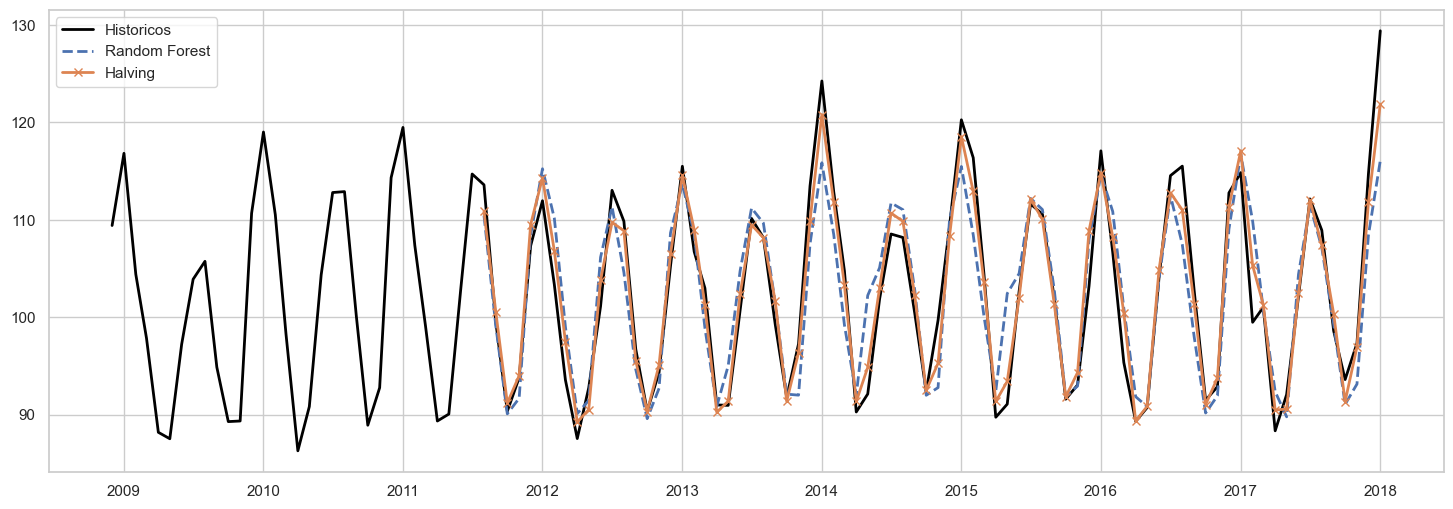

In [38]:
plt.figure(figsize =  (18,6))
plt.plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2)
plt.plot(forecast.index , forecast["rf"], label = "Random Forest", linestyle='--', linewidth = 2)
plt.plot(forecast.index , forecast["Halving_grid_search"], label = "Halving", marker='x', linewidth = 2)
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
print('Testing R2 Score: ', r2_score(y_test, pred_rf_halving)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf_halving)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf_halving))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf_halving))

Testing R2 Score:  94.29670368643029
Testing RMSE:  2.2901865562837713
Testing MAE:  1.7585381206987165
Testing MSE:  5.24495446258292


# HalvingRandomSearchCV

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint
import numpy as np


clf4 = RandomForestRegressor()

Halving_random = {
    'bootstrap': [True],
    'max_depth': range(2, 20, 1),
    'max_features': range(2, 8, 1),
    'min_samples_leaf': range(2, 5, 1),
    'min_samples_split': [8, 10, 12],
    #'n_estimators':  range(100, 2000, 100),
    'criterion': ["squared_error", "r2"]       } 

halving_random = HalvingRandomSearchCV(clf, Halving_random,
                               resource='n_estimators',
                               max_resources=10,
                               random_state=0).fit(X, y)
halving_random.best_params_  

{'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 6,
 'max_depth': 14,
 'criterion': 'squared_error',
 'bootstrap': True,
 'n_estimators': 9}

In [44]:
best_grid4 = halving_random.best_estimator_
best_grid4

RandomForestRegressor(max_depth=14, max_features=6, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=9)

In [45]:
pred_rf_halving_random = best_grid4.predict(X_test)

In [46]:
forecast["Halving_Random"] = pred_rf_halving_random
forecast

,Value,rf,rf_random_search,Halving_grid_search,Halving_Random
DATE,,,,,
2011-08-01,113.5958,110.444032,109.887420,110.866940,111.669038
2011-09-01,99.4712,99.079984,98.659693,100.512518,99.470511
2011-10-01,90.3566,90.091596,90.033010,91.204841,91.407667
2011-11-01,93.8095,91.696935,91.301922,94.006150,93.244940
2011-12-01,107.3312,108.444590,107.430003,109.507871,108.422328
...,...,...,...,...,...
2017-09-01,98.6154,99.287481,99.283066,100.371965,97.815911
2017-10-01,93.6137,91.064483,91.220886,91.356318,92.215899
2017-11-01,97.3359,93.151932,93.346552,96.968074,96.770511


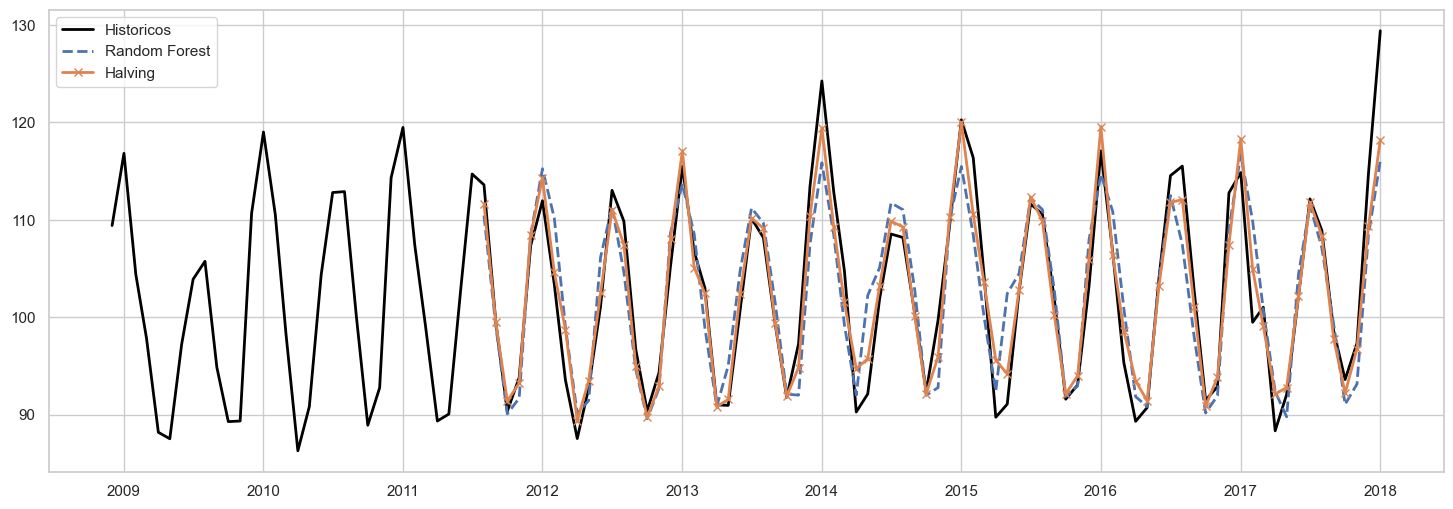

In [47]:
plt.figure(figsize =  (18,6))
plt.plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2)
plt.plot(forecast.index , forecast["rf"], label = "Random Forest", linestyle='--', linewidth = 2)
plt.plot(forecast.index , forecast["Halving_Random"], label = "Halving", marker='x', linewidth = 2)
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
print('Testing R2 Score: ', r2_score(y_test, pred_rf_halving_random)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf_halving_random)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf_halving_random))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf_halving_random))

Testing R2 Score:  91.79289179271399
Testing RMSE:  2.7472803051627834
Testing MAE:  1.989584446799638
Testing MSE:  7.547549075135317


## **Optimización Bayesiana**

**Automated Hyperparameter Tuning**

Como hemos visto anteriormente, ajustar los hiperparámetros de aprendizaje automático es una tarea tediosa pero crucial, ya que el rendimiento de un algoritmo puede depender en gran medida de la elección de los hiperparámetros. El ajuste manual le quita tiempo a los pasos importantes de la tubería de aprendizaje automático, como la ingeniería de funciones y la interpretación de los resultados. La búsqueda en grid y aleatoria son prácticas, pero requieren tiempos de ejecución prolongados porque desperdician tiempo evaluando áreas poco prometedoras del espacio de búsqueda. Cada vez más, el ajuste de hiperparámetros se realiza mediante métodos automatizados que tienen como objetivo encontrar hiperparámetros óptimos en menos tiempo mediante una búsqueda informada sin el esfuerzo manual necesario más allá de la configuración inicial.

Cuando se utiliza el Ajuste de Hiperparámetros Automatizado, los hiperparámetros del modelo a utilizar se identifican utilizando técnicas como: Optimización Bayesiana, Descenso de Gradiente y Algoritmos Evolutivos.



In [ ]:
#@title
from IPython.display import Image
Image("/content/drive/MyDrive/Curso de ML 3 version/Sesión N° 03/imagen/bayesesia1.png")

La optimización bayesiana, un método basado en modelos para encontrar el mínimo de una función, mientras que el objetivo final es encontrar el valor de entrada a una función que nos puede dar el valor de salida más bajo posible ha dado como resultado un mejor rendimiento y requiere menos iteraciones que las aleatorias. búsqueda. Por lo tanto, la optimización bayesiana puede generar un mejor rendimiento en la fase de prueba y reducir el tiempo de optimización.

La optimización bayesiana se puede realizar en Python utilizando la biblioteca Hyperopt.


En Hyperopt, la Optimización Bayesiana se puede implementar dando 3 tres parámetros principales a la función fmin().

* **Función Objetivo** = define la función de pérdida a minimizar.
* **Espacio de Dominio** = define el rango de valores de entrada a probar (en Optimización Bayesiana este espacio crea una distribución de probabilidad para cada uno de los Hiperparámetros usados).
* **Algoritmo de optimización** = define el algoritmo de búsqueda que se usará para seleccionar los mejores valores de entrada para usar en cada nueva iteración.

Adicionalmente, también se puede definir en **fmin()** el número máximo de evaluaciones a realizar.

La optimización bayesiana puede reducir el número de iteraciones de búsqueda eligiendo los valores de entrada teniendo en cuenta los resultados anteriores. De esta forma, podemos concentrar nuestra búsqueda desde el principio en valores que se acerquen más a nuestro resultado deseado.
Ahora podemos ejecutar nuestro Optimizador Bayesiano usando la función fmin(). Primero se crea un objeto Trials() para que sea posible visualizar más tarde lo que estaba sucediendo mientras se ejecutaba la función **fmin()** (por ejemplo, cómo cambiaba la función de pérdida y cómo cambiaban los hiperparámetros usados).

Hyperopt es una de varias bibliotecas de ajuste de hiperparámetros automatizadas que utilizan la optimización bayesiana. Estas bibliotecas difieren en el algoritmo utilizado para construir el sustituto (modelo de probabilidad) de la función objetivo y elegir los siguientes hiperparámetros para evaluar en la función objetivo. Hyperopt utiliza el Tree Parzen Estimator (TPE). Otras bibliotecas de Python incluyen Spearmint, que utiliza un proceso gaussiano para el sustituto, y SMAC, que utiliza una regresión de bosque aleatoria.

Hyperopt tiene una sintaxis simple para estructurar un problema de optimización que se extiende más allá del ajuste de hiperparámetros a cualquier problema que involucre la minimización de una función.

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space = {'criterion': hp.choice('criterion', ["squared_error"]),
        'max_depth': hp.quniform('max_depth', 10, 12, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50])
    }

In [ ]:
def objective(space):
    model = RandomForestRegressor(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 20,
            trials= trials)
best

Ahora podemos recuperar el conjunto de **mejores** parámetros identificados y probar nuestro modelo usando el **mejor** diccionario creado durante el entrenamiento. Algunos de los parámetros se han almacenado numéricamente en el **mejor** diccionario usando índices, por lo tanto, primero debemos convertirlos nuevamente como cadenas antes de ingresarlos en nuestro bosque aleatorio.

**Recurso adicional**

# `Referencia`

1. [Halving](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html#sklearn.model_selection.HalvingGridSearchCV)